# Indoor Location - Exploratory Data Analysis


In this competition, your task is to predict the indoor position of smartphones based on real-time sensor data, provided by indoor positioning technology company XYZ10 in partnership with Microsoft Research. You'll locate devices using “active” localization data, which is made available with the cooperation of the user. Unlike passive localization methods (e.g. radar, camera), the data provided for this competition requires explicit user permission. You'll work with a dataset of nearly 30,000 traces from over 200 buildings.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/22559/logos/header.png)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:gray; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Metadata](#1)
* [Train](#2)
* [Test](#3)
* [Read data](#4)
* [Visualize data](#5)

<a id="1"></a>
<h2 style='background:gray; border:0; color:white'><center>Metadata<center><h2>

**metadata** - floor metadata folder, organized by site and floor, which includes the following for each floor:
- floor_image.png
- floor_info.json
- geojson_map.json

In [1]:
import os
import glob
import math
import json

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

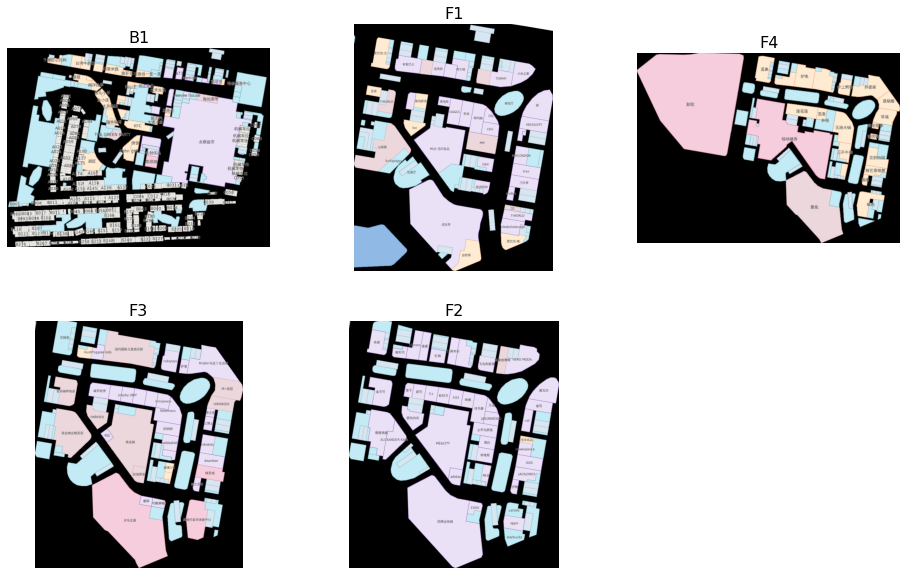

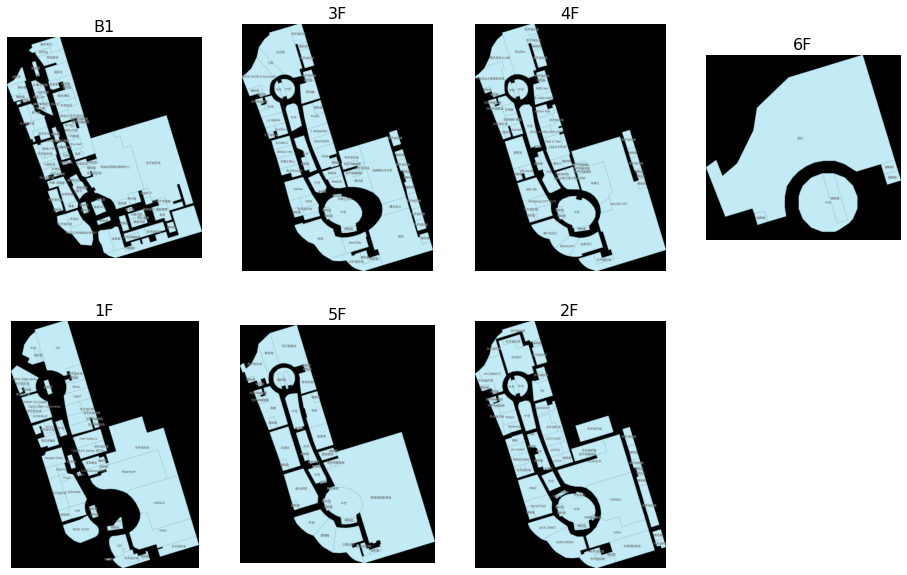

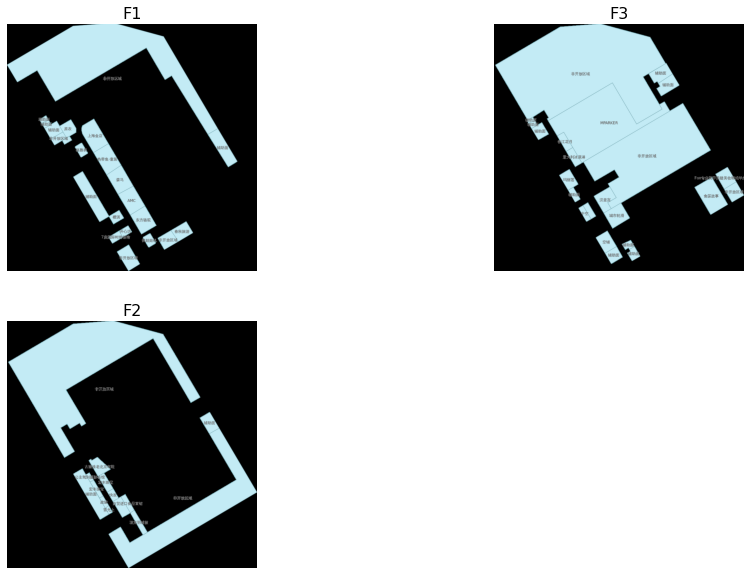

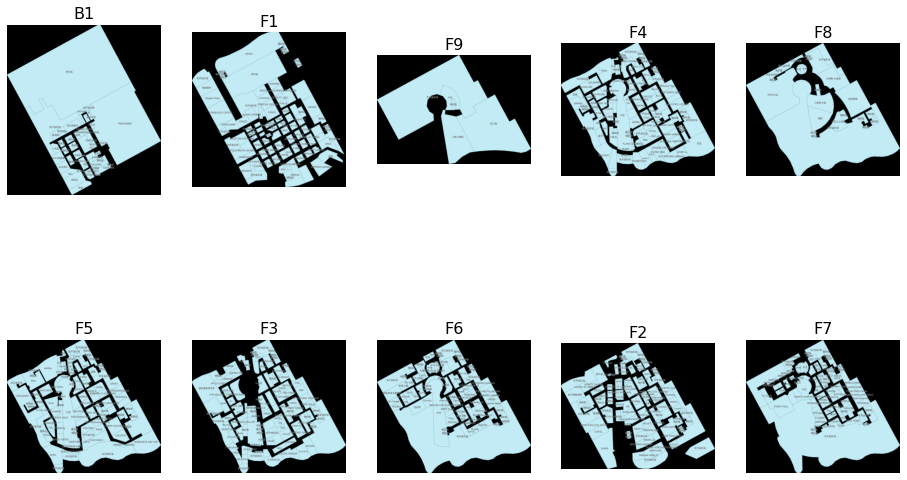

In [2]:
def plot_all_floors(path_to_building):
    plt.figure(figsize=(16, 10))
    floor_paths = glob.glob(os.path.join(path_to_building, "*/floor_image.png"))
    for ind, floor_path in enumerate(floor_paths):
        w = math.ceil(len(floor_paths) / 2)
        h = math.ceil(len(floor_paths) / w)
        plt.subplot(h, w, ind + 1)
        image = cv2.imread(floor_path)  
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis("off")
        plt.title(floor_path.split("/")[-2], fontsize=16)
    plt.show()

    
plot_all_floors("../input/indoor-location-navigation/metadata/5a0546857ecc773753327266/")
plot_all_floors("../input/indoor-location-navigation/metadata/5cd56b64e2acfd2d33b5932f/")
plot_all_floors("../input/indoor-location-navigation/metadata/5cd56b6be2acfd2d33b59d1f/")
plot_all_floors("../input/indoor-location-navigation/metadata/5cd56baee2acfd2d33b61a93/")

<a id="2"></a>
<h2 style='background:gray; border:0; color:white'><center>Train<center><h2>

**train** - training path files, organized by site and floor;    
each path files contains the data of a single path on a single floor

In [3]:
print(f"Number of train sites {len(os.listdir('../input/indoor-location-navigation/train/'))}")

Number of train sites 204


<a id="3"></a>
<h2 style='background:gray; border:0; color:white'><center>Test<center><h2>

**test** - test path files, organized by site and floor;    
each path files contains the data of a single path on a single floor, but without the waypoint (x, y) data;    
the task of this competition is, for a given site-path file, predict the floor and waypoint locations at the timestamps given in the sample_submission.csv file

In [4]:
print(f"Number of test sites {len(os.listdir('../input/indoor-location-navigation/test/'))}")

Number of test sites 626


In [5]:
df_submission = pd.read_csv("../input/indoor-location-navigation/sample_submission.csv", index_col=0)
df_submission["x"] = 76.
df_submission.head()

,floor,x,y
site_path_timestamp,,,
5a0546857ecc773753327266_046cfa46be49fc10834815c6_0000000000009,0,76.0,75.0
5a0546857ecc773753327266_046cfa46be49fc10834815c6_0000000009017,0,76.0,75.0
5a0546857ecc773753327266_046cfa46be49fc10834815c6_0000000015326,0,76.0,75.0
5a0546857ecc773753327266_046cfa46be49fc10834815c6_0000000018763,0,76.0,75.0
5a0546857ecc773753327266_046cfa46be49fc10834815c6_0000000022328,0,76.0,75.0


In [6]:
df_submission.to_csv("submission.csv")

<a id="4"></a>
<h2 style='background:gray; border:0; color:white'><center>Read data<center><h2>

Each train and test data file contains the next components:
- acce
- acce_uncali
- gyro
- gyro_uncali
- magn
- magn_uncali
- ahrs
- wifi
- ibeacon
- waypoint


In [7]:
# copy from https://github.com/location-competition/indoor-location-competition-20/blob/master/io_f.py

from dataclasses import dataclass

import numpy as np


@dataclass
class ReadData:
    acce: np.ndarray
    acce_uncali: np.ndarray
    gyro: np.ndarray
    gyro_uncali: np.ndarray
    magn: np.ndarray
    magn_uncali: np.ndarray
    ahrs: np.ndarray
    wifi: np.ndarray
    ibeacon: np.ndarray
    waypoint: np.ndarray


def read_data_file(data_filename):
    acce = []
    acce_uncali = []
    gyro = []
    gyro_uncali = []
    magn = []
    magn_uncali = []
    ahrs = []
    wifi = []
    ibeacon = []
    waypoint = []

    with open(data_filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line_data in lines:
        line_data = line_data.strip()
        if not line_data or line_data[0] == '#':
            continue

        line_data = line_data.split('\t')

        if line_data[1] == 'TYPE_ACCELEROMETER':
            acce.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_ACCELEROMETER_UNCALIBRATED':
            acce_uncali.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_GYROSCOPE':
            gyro.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_GYROSCOPE_UNCALIBRATED':
            gyro_uncali.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_MAGNETIC_FIELD':
            magn.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_MAGNETIC_FIELD_UNCALIBRATED':
            magn_uncali.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_ROTATION_VECTOR':
            ahrs.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_WIFI':
            sys_ts = line_data[0]
            ssid = line_data[2]
            bssid = line_data[3]
            rssi = line_data[4]
            lastseen_ts = line_data[6]
            wifi_data = [sys_ts, ssid, bssid, rssi, lastseen_ts]
            wifi.append(wifi_data)
            continue

        if line_data[1] == 'TYPE_BEACON':
            ts = line_data[0]
            uuid = line_data[2]
            major = line_data[3]
            minor = line_data[4]
            rssi = line_data[6]
            ibeacon_data = [ts, '_'.join([uuid, major, minor]), rssi]
            ibeacon.append(ibeacon_data)
            continue

        if line_data[1] == 'TYPE_WAYPOINT':
            waypoint.append([int(line_data[0]), float(line_data[2]), float(line_data[3])])

    acce = np.array(acce)
    acce_uncali = np.array(acce_uncali)
    gyro = np.array(gyro)
    gyro_uncali = np.array(gyro_uncali)
    magn = np.array(magn)
    magn_uncali = np.array(magn_uncali)
    ahrs = np.array(ahrs)
    wifi = np.array(wifi)
    ibeacon = np.array(ibeacon)
    waypoint = np.array(waypoint)
    
#     print(acce.shape)
#     print(acce_uncali.shape)
#     print(gyro.shape)
#     print(gyro_uncali.shape)
#     print(magn.shape)
#     print(magn_uncali.shape)
#     print(ahrs.shape)
#     print(wifi.shape)
#     print(ibeacon.shape)
#     print(waypoint.shape)
    
    return ReadData(acce, acce_uncali, gyro, gyro_uncali, magn, magn_uncali, ahrs, wifi, ibeacon, waypoint)

In [8]:
train_floor_data = read_data_file("../input/indoor-location-navigation/train/5a0546857ecc773753327266/B1/5e15730aa280850006f3d005.txt")
print("acce", train_floor_data.acce.shape)
print("acce_uncali", train_floor_data.acce_uncali.shape)
print("gyro", train_floor_data.gyro.shape)
print("gyro_uncali", train_floor_data.gyro_uncali.shape)
print("magn", train_floor_data.magn.shape)
print("magn_uncali", train_floor_data.magn_uncali.shape)
print("ahrs", train_floor_data.ahrs.shape)
print("wifi", train_floor_data.wifi.shape)
print("ibeacon", train_floor_data.ibeacon.shape)
print("waypoint", train_floor_data.waypoint.shape)
with open("../input/indoor-location-navigation/metadata/5a0546857ecc773753327266/B1/floor_info.json") as f:
    train_floor_info = json.load(f)

acce (1648, 4)
acce_uncali (1648, 4)
gyro (1648, 4)
gyro_uncali (1648, 4)
magn (1648, 4)
magn_uncali (1648, 4)
ahrs (1648, 4)
wifi (2101, 5)
ibeacon (558, 3)
waypoint (4, 3)


In [9]:
test_floor_data = read_data_file("../input/indoor-location-navigation/test/00ff0c9a71cc37a2ebdd0f05.txt")
print("acce", test_floor_data.acce.shape)
print("acce_uncali", test_floor_data.acce_uncali.shape)
print("gyro", test_floor_data.gyro.shape)
print("gyro_uncali", test_floor_data.gyro_uncali.shape)
print("magn", test_floor_data.magn.shape)
print("magn_uncali", test_floor_data.magn_uncali.shape)
print("ahrs", test_floor_data.ahrs.shape)
print("wifi", test_floor_data.wifi.shape)
print("ibeacon", test_floor_data.ibeacon.shape)
print("waypoint", test_floor_data.waypoint.shape)

acce (4378, 4)
acce_uncali (4378, 4)
gyro (4378, 4)
gyro_uncali (4378, 4)
magn (4378, 4)
magn_uncali (4378, 4)
ahrs (4378, 4)
wifi (2731, 5)
ibeacon (43, 3)
waypoint (0,)


<a id="5"></a>
<h2 style='background:gray; border:0; color:white'><center>Visualize data<center><h2>

In [10]:
# copy from https://github.com/location-competition/indoor-location-competition-20/blob/master/visualize_f.py


import plotly.graph_objs as go
from PIL import Image


def save_figure_to_html(fig, filename):
    fig.write_html(filename)


def visualize_trajectory(trajectory, floor_plan_filename, width_meter, height_meter, title=None, mode='lines + markers + text', show=False):
    fig = go.Figure()

    # add trajectory
    size_list = [6] * trajectory.shape[0]
    size_list[0] = 10
    size_list[-1] = 10

    color_list = ['rgba(4, 174, 4, 0.5)'] * trajectory.shape[0]
    color_list[0] = 'rgba(12, 5, 235, 1)'
    color_list[-1] = 'rgba(235, 5, 5, 1)'

    position_count = {}
    text_list = []
    for i in range(trajectory.shape[0]):
        if str(trajectory[i]) in position_count:
            position_count[str(trajectory[i])] += 1
        else:
            position_count[str(trajectory[i])] = 0
        text_list.append('        ' * position_count[str(trajectory[i])] + f'{i}')
    text_list[0] = 'Start Point: 0'
    text_list[-1] = f'End Point: {trajectory.shape[0] - 1}'

    fig.add_trace(
        go.Scattergl(
            x=trajectory[:, 0],
            y=trajectory[:, 1],
            mode=mode,
            marker=dict(size=size_list, color=color_list),
            line=dict(shape='linear', color='rgb(100, 10, 100)', width=2, dash='dot'),
            text=text_list,
            textposition="top center",
            name='trajectory',
        ))

    # add floor plan
    floor_plan = Image.open(floor_plan_filename)
    fig.update_layout(images=[
        go.layout.Image(
            source=floor_plan,
            xref="x",
            yref="y",
            x=0,
            y=height_meter,
            sizex=width_meter,
            sizey=height_meter,
            sizing="contain",
            opacity=1,
            layer="below",
        )
    ])

    # configure
    fig.update_xaxes(autorange=False, range=[0, width_meter])
    fig.update_yaxes(autorange=False, range=[0, height_meter], scaleanchor="x", scaleratio=1)
    fig.update_layout(
        title=go.layout.Title(
            text=title or "No title.",
            xref="paper",
            x=0,
        ),
        autosize=True,
        width=900,
        height=200 + 900 * height_meter / width_meter,
        template="plotly_white",
    )

    if show:
        fig.show()

    return fig


def visualize_heatmap(position, value, floor_plan_filename, width_meter, height_meter, colorbar_title="colorbar", title=None, show=False):
    fig = go.Figure()

    # add heat map
    fig.add_trace(
        go.Scatter(x=position[:, 0],
                   y=position[:, 1],
                   mode='markers',
                   marker=dict(size=7,
                               color=value,
                               colorbar=dict(title=colorbar_title),
                               colorscale="Rainbow"),
                   text=value,
                   name=title))

    # add floor plan
    floor_plan = Image.open(floor_plan_filename)
    fig.update_layout(images=[
        go.layout.Image(
            source=floor_plan,
            xref="x",
            yref="y",
            x=0,
            y=height_meter,
            sizex=width_meter,
            sizey=height_meter,
            sizing="contain",
            opacity=1,
            layer="below",
        )
    ])

    # configure
    fig.update_xaxes(autorange=False, range=[0, width_meter])
    fig.update_yaxes(autorange=False, range=[0, height_meter], scaleanchor="x", scaleratio=1)
    fig.update_layout(
        title=go.layout.Title(
            text=title or "No title.",
            xref="paper",
            x=0,
        ),
        autosize=True,
        width=900,
        height=200 + 900 * height_meter / width_meter,
        template="plotly_white",
    )

    if show:
        fig.show()

    return fig

In [11]:
def visualize_train_trajectory(path):
    _id, floor = path.split("/")[:2]
    
    train_floor_data = read_data_file(os.path.join("../input/indoor-location-navigation/train/", path))
    with open(f"../input/indoor-location-navigation/metadata/{_id}/{floor}/floor_info.json") as f:
        train_floor_info = json.load(f)

    return visualize_trajectory(
        train_floor_data.waypoint[:, 1:3], 
        f"../input/indoor-location-navigation/metadata/{_id}/{floor}/floor_image.png",
        train_floor_info["map_info"]["width"], 
        train_floor_info["map_info"]["width"],
    )


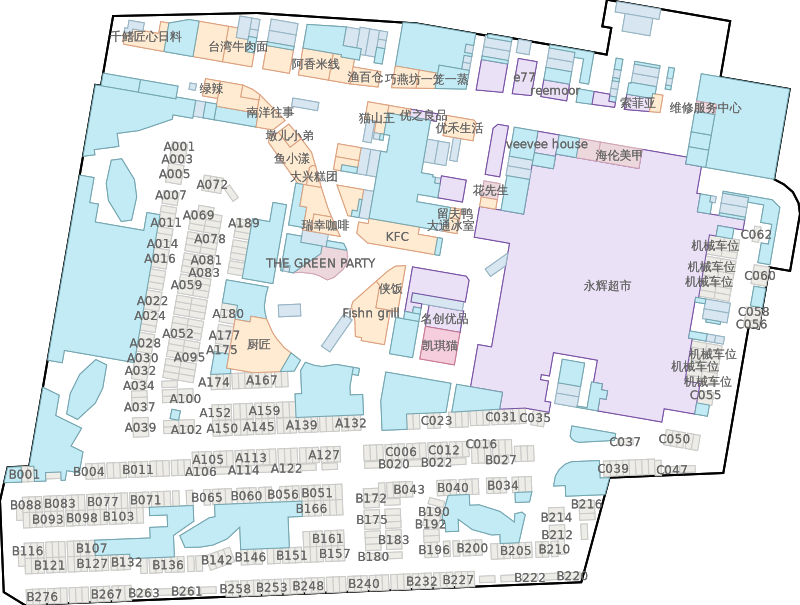

In [12]:
visualize_train_trajectory("5a0546857ecc773753327266/B1/5e15730aa280850006f3d005.txt")


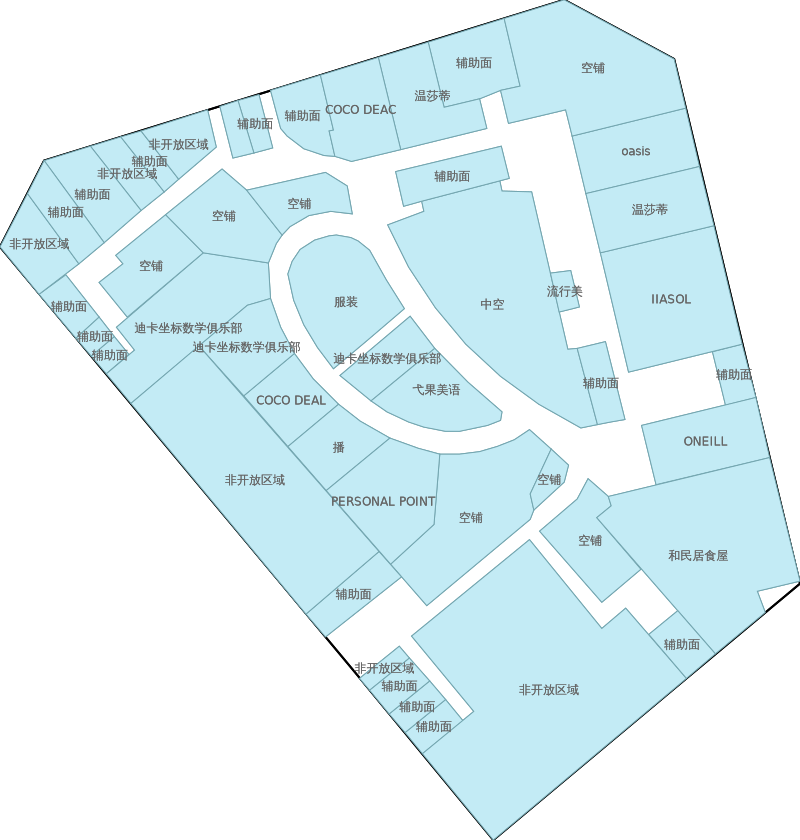

In [13]:
visualize_train_trajectory("5cd56b67e2acfd2d33b596bd/F2/5cf5dd5bd1378b0009268ad5.txt")


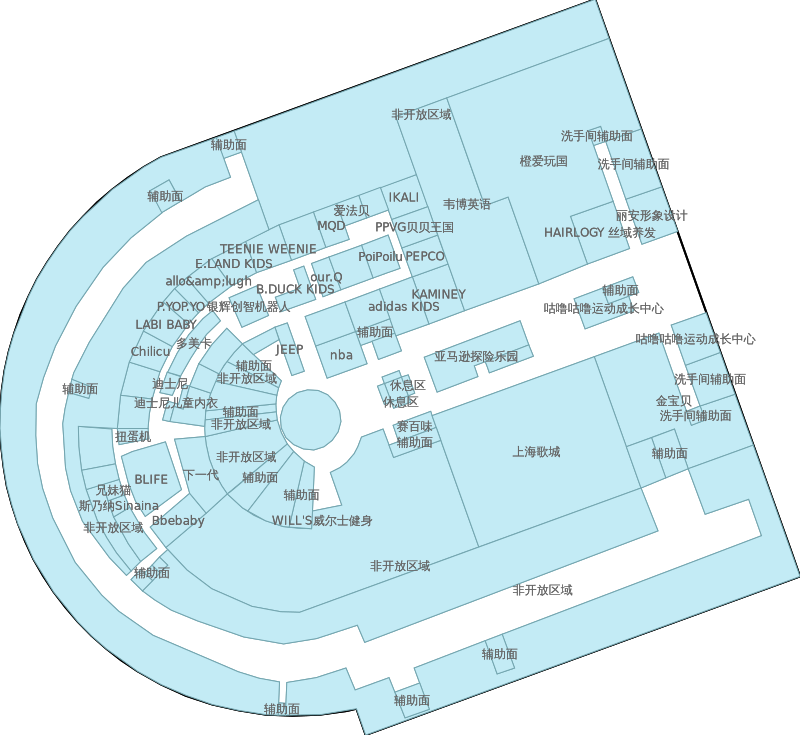

In [14]:
visualize_train_trajectory("5cd56b5ae2acfd2d33b5854a/B1/5d07424a1a69370008bc5de5.txt")


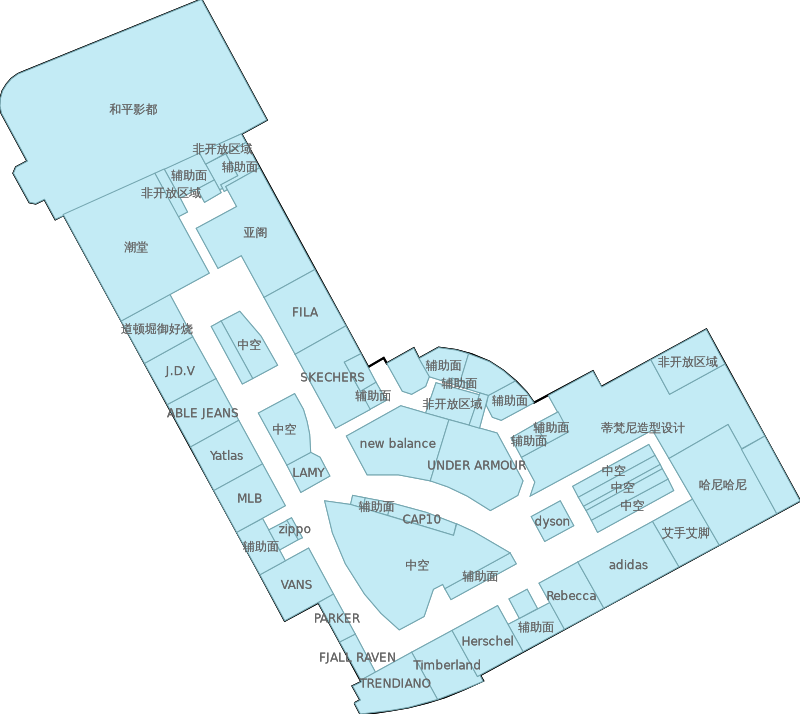

In [15]:
visualize_train_trajectory("5cd56bade2acfd2d33b61a61/F5/5cf77f57e23e6e000833f22a.txt")


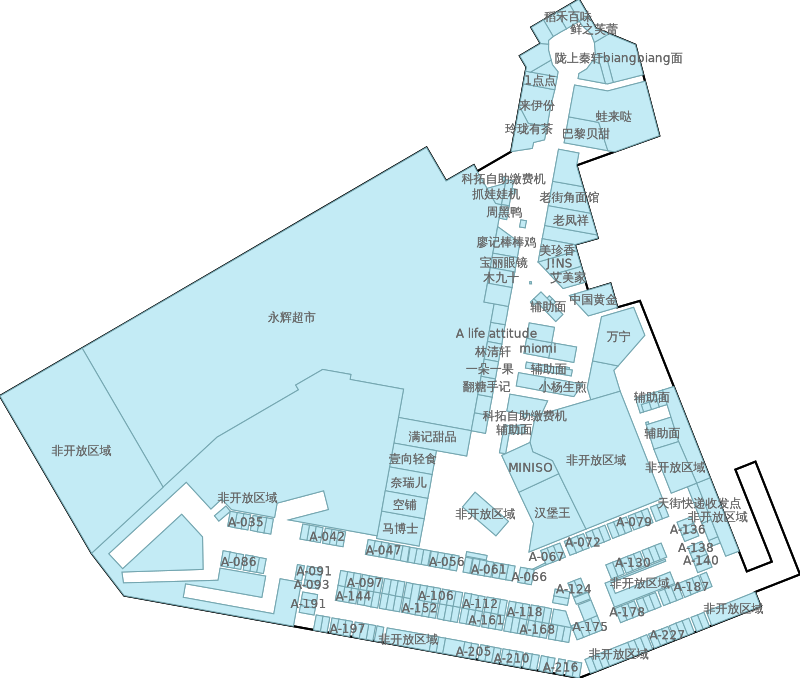

In [16]:
visualize_train_trajectory("5dc8cea7659e181adb076a3f/B1/5dcf883e94e49000061256bc.txt")